In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-06-01 17:13:13.267376


#### Current runs for implementation

In [5]:
runs = [
    'run_0090'
]

#### Check that all run files are up-to-date

In [6]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0090 - 2018-05-31 00:00:00


#### Import

In [7]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]
run1 = RunManager('StatArbStrategy', 'run_0090', test_periods=0, start_year=2009, drop_params=drop_params)

## Create combo search
comb = CombinationSearch(write_flag=True)
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

#for r in runs:
comb.add_run(run1)

In [8]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180601171351
Max date: 2018-05-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [04:16<00:00, 12.74s/it]


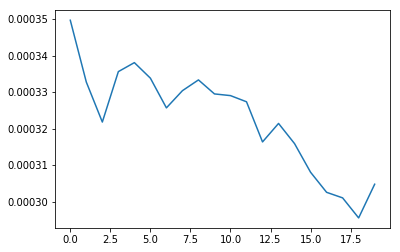

In [9]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

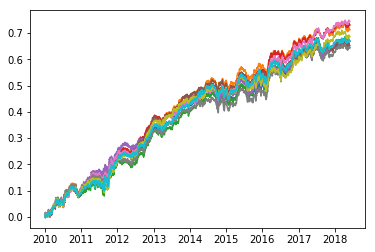

In [10]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [11]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.043976,0.002581,0.064172,-0.006542,0.104188
2011,0.029221,0.025546,-0.016410,0.081577,0.119934
2012,0.018106,-0.013535,0.032954,0.073728,0.111253
2013,-0.009397,0.033268,0.054505,0.011807,0.090183
2014,0.033655,0.003199,-0.019891,0.017517,0.034480
2015,-0.011930,0.042916,-0.027376,0.037186,0.040797
2016,0.066200,-0.019487,0.012179,0.040553,0.099445
2017,0.025625,0.031125,-0.019418,0.004288,0.041620


In [12]:
df.year.iloc[:-1].mean()

0.080237565015516543